🌱 인프런 📚 모두의 한국어 텍스트 분석과 자연어처리 with 파이썬 🐍 https://inf.run/FX4TP


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/python-text-analysis/blob/main/0203-clustering-basic-output.ipynb)

## 라이브러리 로드

In [ ]:
# !pip install koreanize-matplotlib
# !pip install pecab

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 예시 텍스트

In [32]:
# 음식 리뷰 예제 텍스트 데이터
corpus = [
    "샐러드 맛이 깔끔해서 좋아요.",
    "주문한 음식이 늦게 와서 배고팠어요.",
    "피자가 맛있어요.",
    "라면이 너무 짜게 나왔어요.",
    "배달된 치킨이 맛있어요.",
    "메뉴 설명보다 양이 적어요.",
    "주문한 음식이 다른 것으로 와서 다시 주문했어요.",
    "맛은 좋은데 양이 좀 적은 편이에요.",
    "떡볶이의 매운맛이 적절해요.",
    "초밥이 신선해서 좋았어요.",
    "빵이 부드럽고 맛있네요!",
    "스테이크가 너무 질겼어요.",
    "샐러드의 드레싱이 너무 강했어요.",
    "나초의 치즈소스가 맛있었어요.",
    "파스타가 약간 덜 익은 것 같아요.",
    "커피가 너무 진해서 물을 더 추가했어요.",
    "디저트는 달지 않아서 좋았습니다.",
    "음료가 너무 달아서 다음엔 당도 조절할게요.",
    "피자 도우가 너무 두꺼워서 먹기 힘들었어요.",
    "햄버거의 빵이 너무 딱딱해요.",
    "감자튀김이 너무 기름져서 느끼했어요.",
    "치즈케이크가 아주 부드럽고 맛있어요."
]

## 전처리
### 형태소 분석기를 통한 조사 구두점 제거
* https://github.com/hyunwoongko/pecab
* 조사, 구두점 제거
* 품사태그표 : 
    * https://konlpy.org/ko/v0.6.0/morph/
    * https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

In [9]:
# pecab
from pecab import PeCab

pecab = PeCab()
pecab

In [33]:
corpus_pecab = []
for corpus_text in corpus:
    join_text = []
    for text, pos in pecab.pos(corpus_text, drop_space=False):
        if (not pos.startswith("J")) and (pos not in ["SF"]):
            join_text.append(text)
    corpus_pecab.append("".join(join_text))
corpus_pecab

['샐러드 맛 깔끔해서 좋아요',
 '주문한 음식 늦게 와서 배고팠어요',
 '피자 맛있어요',
 '라면 너무 짜게 나왔어요',
 '배달된 치킨 맛있어요',
 '메뉴 설명 양 적어요',
 '주문한 음식 다른 것 와서 다시 주문했어요',
 '맛 좋은데 양 좀 적은 편이에요',
 '떡볶이 매운맛 적절해요',
 '초밥 신선해서 좋았어요',
 '빵 부드럽고 맛있네요',
 '스테이크 너무 질겼어요',
 '샐러드 드레싱 너무 강했어요',
 '나초 치즈소스 맛있었어요',
 '파스타 약간 덜 익은 것 같아요',
 '커피 너무 진해서 물 더 추가했어요',
 '디저트 달지 않아서 좋았습니다',
 '음료 너무 달아서 다음 당도 조절할게요',
 '피자 도우 너무 두꺼워서 먹기 힘들었어요',
 '햄버거 빵 너무 딱딱해요',
 '감자튀김 너무 기름져서 느끼했어요',
 '치즈케이크 아주 부드럽고 맛있어요']

## 텍스트 벡터화
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text

In [95]:
# vectorizer
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(corpus_pecab)
dtm

<22x67 sparse matrix of type '<class 'numpy.float64'>'
	with 82 stored elements in Compressed Sparse Row format>

In [96]:
vectorizer.get_feature_names_out()

array(['감자튀김', '강했어요', '같아요', '기름져서', '깔끔해서', '나왔어요', '나초', '너무', '느끼했어요',
       '늦게', '다른', '다시', '다음', '달아서', '달지', '당도', '도우', '두꺼워서', '드레싱',
       '디저트', '딱딱해요', '떡볶이', '라면', '맛있네요', '맛있어요', '맛있었어요', '매운맛', '먹기',
       '메뉴', '배고팠어요', '배달된', '부드럽고', '샐러드', '설명', '스테이크', '신선해서', '아주',
       '않아서', '약간', '와서', '음료', '음식', '익은', '적어요', '적은', '적절해요', '조절할게요',
       '좋아요', '좋았습니다', '좋았어요', '좋은데', '주문한', '주문했어요', '진해서', '질겼어요', '짜게',
       '초밥', '추가했어요', '치즈소스', '치즈케이크', '치킨', '커피', '파스타', '편이에요', '피자',
       '햄버거', '힘들었어요'], dtype=object)

In [97]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
df_dtm.shape

(22, 67)

## 군집화

* https://scikit-learn.org/stable/modules/clustering.html#k-means
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [120]:
# K-means 군집화
num_clusters = 7 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters, n_init="auto", random_state=42)
clusters = kmeans.fit(df_dtm).predict(df_dtm)
clusters

array([1, 2, 5, 1, 5, 1, 2, 6, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4],
      dtype=int32)

In [121]:
# labels_
kmeans.labels_

array([1, 2, 5, 1, 5, 1, 2, 6, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4],
      dtype=int32)

## 군집화 결과
* 같은 내용의 텍스트끼리 군집화가 되었는지 확인

In [122]:
df = pd.DataFrame()
df["corpus"] = corpus
df["label"] = kmeans.labels_
df.sort_values("label")

,corpus,label
8,떡볶이의 매운맛이 적절해요.,0
14,파스타가 약간 덜 익은 것 같아요.,1
13,나초의 치즈소스가 맛있었어요.,1
12,샐러드의 드레싱이 너무 강했어요.,1
11,스테이크가 너무 질겼어요.,1
20,감자튀김이 너무 기름져서 느끼했어요.,1
9,초밥이 신선해서 좋았어요.,1
15,커피가 너무 진해서 물을 더 추가했어요.,1
0,샐러드 맛이 깔끔해서 좋아요.,1
5,메뉴 설명보다 양이 적어요.,1


In [123]:
df["label"].value_counts()

label
1    13
2     2
5     2
4     2
6     1
0     1
3     1
Name: count, dtype: int64

### 차원축소와 시각화
* https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
* 실제 텍스트와 label_ 값이 비슷한 의미의 텍스트끼리 군집화 되었는지 차원 축소기법을 통해 2차원 평면에 표현해 봅니다.

In [124]:
df_dtm.shape

(22, 67)

In [125]:
# t-SNE (t-distributed Stochastic Neighbor Embedding)
from sklearn.manifold import TSNE

# help(TSNE)
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_result = tsne.fit_transform(df_dtm)

In [126]:
df_tsne = pd.DataFrame(tsne_result, columns=["x", "y"])
df_tsne["corpus"] = corpus
df_tsne["label"] = kmeans.labels_
df_tsne

,x,y,corpus,label
0,1.981525,3.346380,샐러드 맛이 깔끔해서 좋아요.,1
1,0.025337,-9.345027,주문한 음식이 늦게 와서 배고팠어요.,2
2,-14.553224,-0.477301,피자가 맛있어요.,5
3,-2.886031,19.599838,라면이 너무 짜게 나왔어요.,1
4,-18.636333,-2.218875,배달된 치킨이 맛있어요.,5
5,-38.751343,-3.634021,메뉴 설명보다 양이 적어요.,1
6,3.398985,-8.017451,주문한 음식이 다른 것으로 와서 다시 주문했어요.,2
7,-7.759202,-29.874292,맛은 좋은데 양이 좀 적은 편이에요.,6
8,23.096228,-7.471128,떡볶이의 매운맛이 적절해요.,0
9,-33.593315,20.094219,초밥이 신선해서 좋았어요.,1


In [127]:
# plt.colormaps()

<Axes: xlabel='x', ylabel='y'>

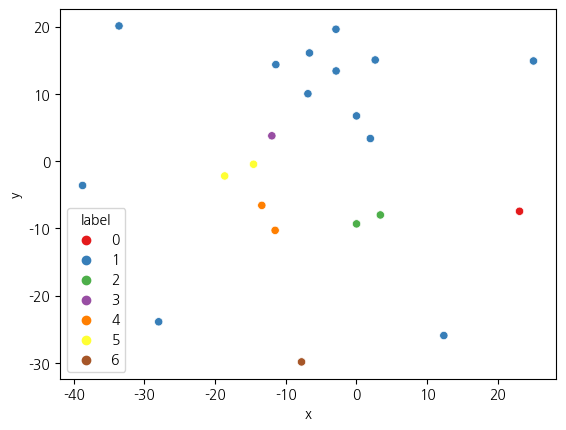

In [128]:
# 2차원 산점도로 군집 결과 시각화
sns.scatterplot(data=df_tsne, x="x", y="y", hue="label", palette="Set1")

In [129]:
# plt.text?

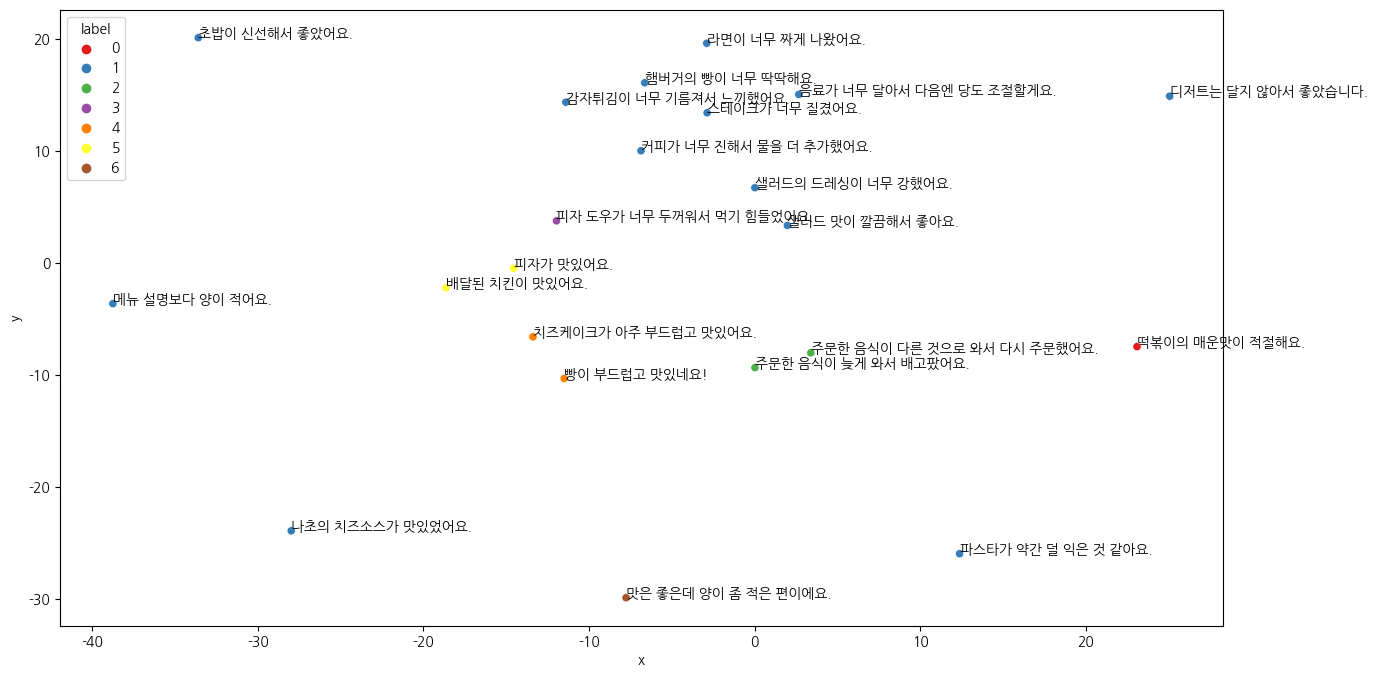

In [130]:
# 어떤 텍스트인지 표기하기
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_tsne, x="x", y="y", hue="label", palette="Set1")
for i in df_tsne.index:
    plt.text(x=df_tsne.loc[i, "x"], y=df_tsne.loc[i, "y"], s=df_tsne.loc[i, "corpus"])